# <font color='red'> EDA & Data Preprocessing on Google App Store Rating Dataset </font> 

# Domain: Mobile device apps
# Context:
- The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.
# Objective:
- The Goal is to explore the data and pre-process it for future use in any predictive analytics study.
# Data set Information:
- Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

# Attribute Information:

| SL.No | Attribute      | Description                                |
|-------|-------------------|---------------------------------------------|
| 1     | App               | Application name                            |
| 2     | Category          | Category the app belongs to.                              |
| 3     | Rating            | Overall user rating of the app                          |
| 4     | Size              | Size of the app                       |
| 5     | Installs          | Number of user reviews for the app                    |
| 6     | Type              |  Paid or Free                           |
| 7     |  Price             | Price of the app                            |
| 8     | Content Rating     | Age group the app is targeted at - children/Mature 21+ /Adult                         |
| 9     |  Genres            |An app can belong to multiple genres (apart from its main category). For eg. a|
|        |                     | musical family game will belong to Music, Game, Family genres.   |                     
| 10    | Last Updated              | Date when the app was last updated on play store.                       |
| 11    | Current Ver       | Current version of the app available on play store.                         |
| 12    | Android Ver        |    Min required Android Version.         |





# Questions:- 

# 1. Importing the required libraries and read the dataset 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=UserWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

In [2]:
df = pd.read_csv("Apps_data+(1).csv")
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [3]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5946,Bedouin Rivals,FAMILY,4.2,79826,Varies with device,"1,000,000+",Free,0,Everyone 10+,Strategy,"July 26, 2018",4.0.4,4.1 and up


In [4]:
df.shape 

(10841, 13)

<b><font color='green'> ~ In the dataset there are a total of 10841 rows and 13 columns 

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<b> Data Types 
    
<b><font color='green'> ~ Objects:There are a total of 12 columns with object data type(includes non numeric data)</b></font>
    
<b><font color ='green'>~ Float: Only Rating column is a numeric column with float data type. 

# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [6]:
df.describe(include='object').T 

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


<b><font color='green'> Inferences:

- App: There are 10,841 entries. It seems to represent the names of different applications. There are 9,660 unique applications, and 'ROBLOX' is the most frequent app name, occurring 9 times.
- Category: There are 34 unique categories, with 'FAMILY' being the most frequent category, appearing 1,972 times.
- Reviews: There are 6,002 unique review counts. The most common review count is 0, appearing 596 times.
- Size: 'Varies with device' appears 1,695 times, and there are 462 unique sizes. It seems that there is a considerable number of apps with variable sizes.
- Installs: There are 22 unique install counts. The most frequent install count is '1,000,000+', occurring 1,579 times.
- Type: There are 3 unique types. 'Free' is the most common type, appearing 10,039 times.
- Price: There are 93 unique price points. The most common price is 0, occurring 10,040 times.
- Content Rating: There are 6 unique content ratings. 'Everyone' is the most frequent content rating, appearing 8,714 times.
- Genres: There are 120 unique genres. 'Tools' is the most common genre, appearing 842 times.
- Last Updated: There are 1,378 unique last updated dates. 'August 3, 2018' is the most frequent date, occurring 326 times.
- Current Ver: There are 2,832 unique versions. 'Varies with device' is the most frequent version, appearing 1,459 times.
- Android Ver: There are 33 unique Android versions. '4.1 and up' is the most frequent version, occurring 2,451 times.

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<b> Inferences:
    
<b><font color="green">~ There are a total of 9367 entries for the rating section 

<b><font color='green'>~ The average rating of the apps is aprox: 4.19

<b><font color='green'>~ Minimum value is (1) and the Maximum value is (19)  {Considering untreated data:including outliers}

# 4. Check if there are any duplicate records in the dataset? if any drop them.


In [8]:
df[df.duplicated()].shape 

(483, 13)

<b><font color="green"> There are a total of 483 duplicate values, however there has to be a column which uniquely identified the data . Based on Key Column: Removing duplicates based on specific column(here 'App'), keeping unique values in those columns.

In [9]:
df.shape 

(10841, 13)

<b><font color="green">~ shape of the data before removing duplicates

In [10]:
df=df.drop_duplicates(subset=['App'],keep='first')  

In [11]:
df.shape 

(9660, 13)

<b><font color="green"> ~ we are left with 9660 rows after removing duplicates based on the App.


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [12]:
df['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

<b><font color='green'> ~ There is one instane of category which is invalid "1.9". We cam drop that instance.

In [13]:
index_category = df[df['Category'] == '1.9'].index 
index_category 

Index([10472], dtype='int64')

In [14]:
df.drop(index=index_category,inplace=True)

In [15]:
df.shape 

(9659, 13)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low) 


In [16]:
df['Rating'].isnull().sum()

1463

<b><font color='green'>~ There are a total of 1463 null values in the column Rating.

In [17]:
df.dropna(subset='Rating',inplace=True) 

In [18]:
df.shape 

(8196, 13)

<b><font color='green'> After having removed(droped) the '1463' null values from the Rating column we are left with '8196' rows 

In [19]:
#Create a new column 'Rating_category'
#using where to apply condition 
df['Rating_category'] = np.where(df['Rating']>3.5,'high','low')

In [20]:
df['Rating_category'].value_counts()

Rating_category
high    7322
low      874
Name: count, dtype: int64

<b><font color='green'> ~ Created a new column 'Rating_category' where the values are maped based on the the condition that if 'Rating' >3.5 the column rating is high else its low.
    
<b><font color='green'>~ Thus there are 7322 column ratings that are 'high' and 874 column ratings that are 'low'

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


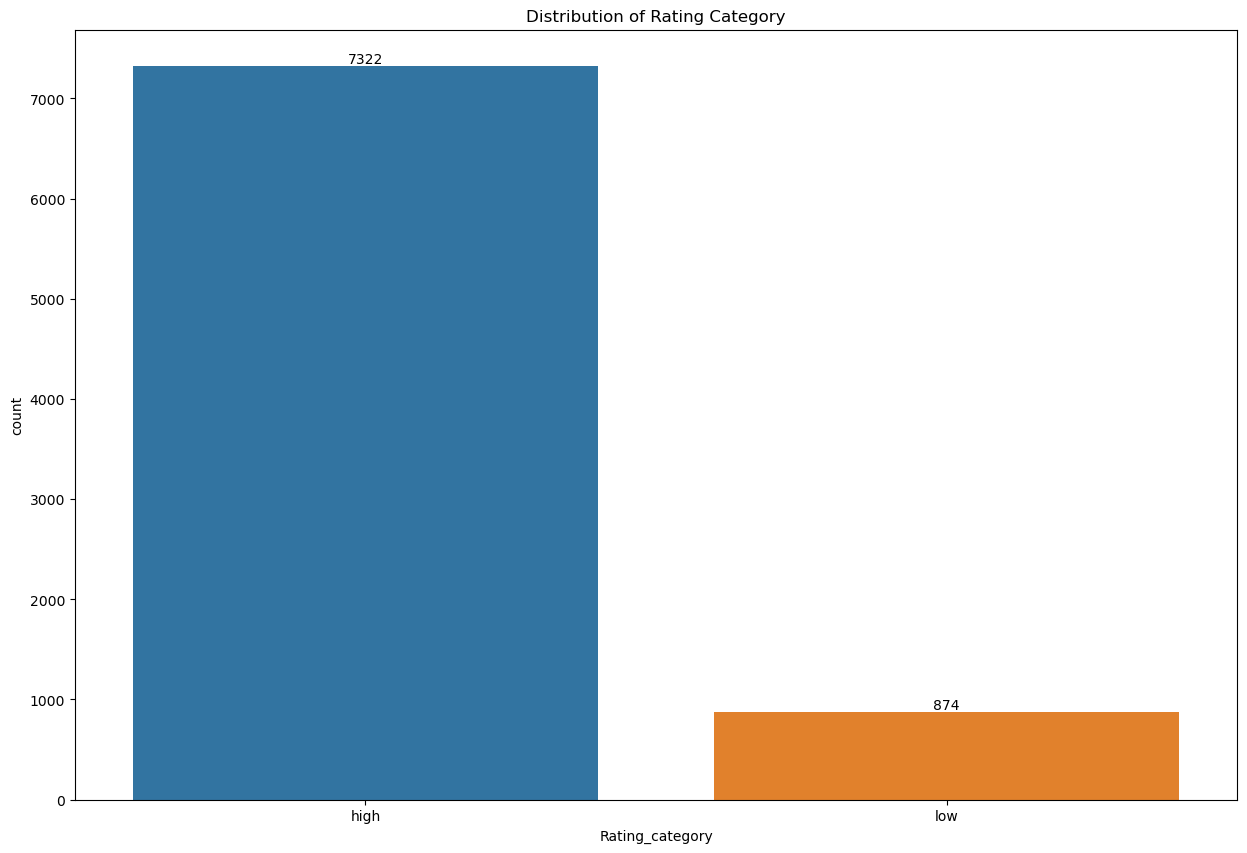

In [21]:
plt.figure(figsize=(15,10))

ax=sns.countplot(data=df,x='Rating_category')
plt.bar_label(ax.containers[0]) 
plt.title('Distribution of Rating Category')
plt.show() 

<b><font color='green'> ~For the categorical column 'Rating_category' we can infer that there are two unique values 'high' and 'low' each having a count of '7322' and '874' respectively. 

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation) 


In [22]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

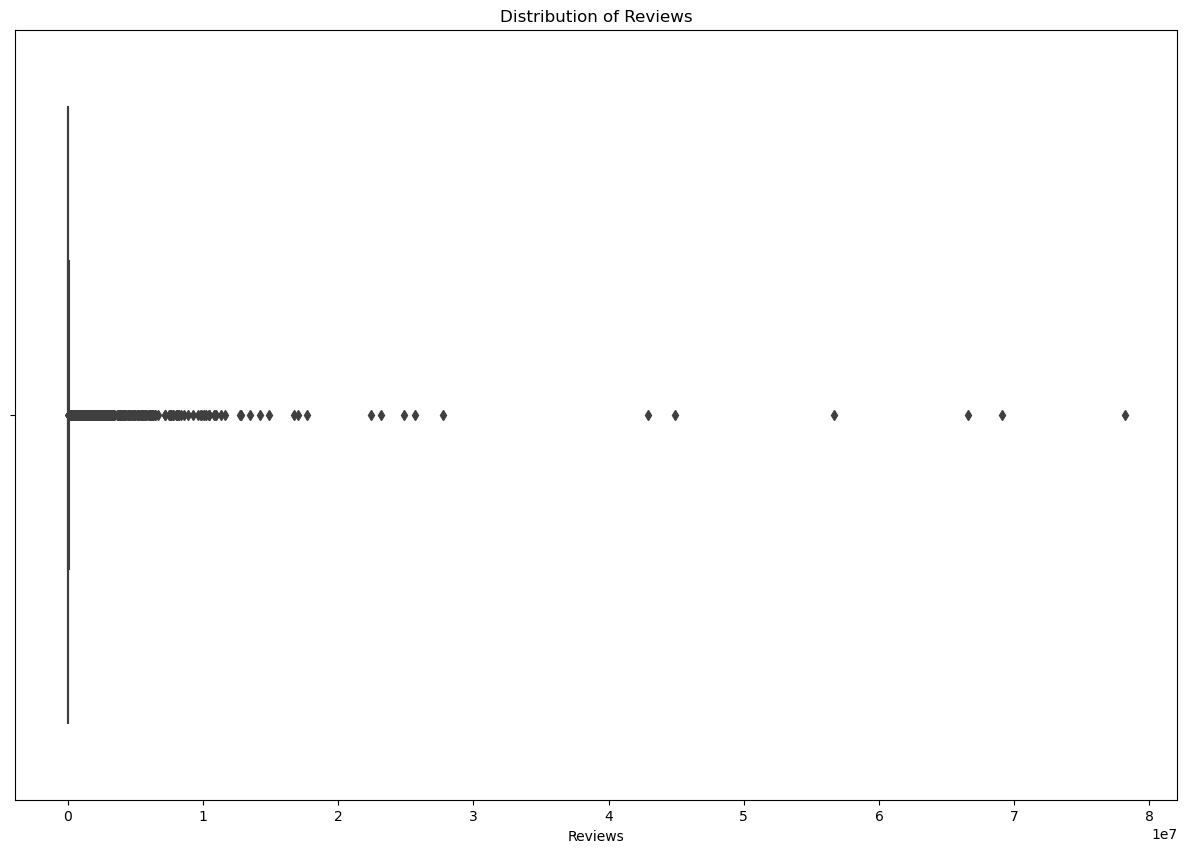

In [23]:
plt.figure(figsize=(15,10))

sns.boxplot(data=df,x='Reviews')
plt.title("Distribution of Reviews")
plt.show()

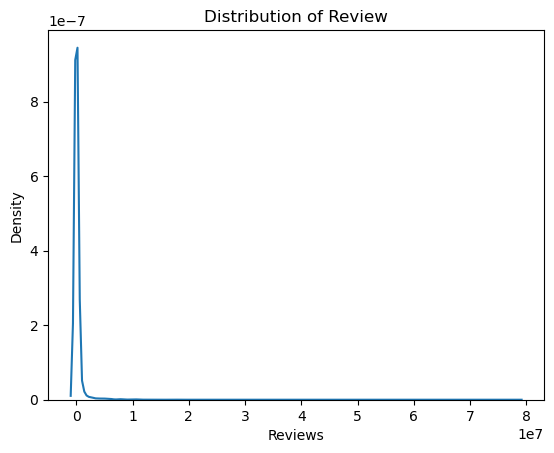

In [24]:
sns.kdeplot(data=df,x=df['Reviews'])
plt.title("Distribution of Review")
plt.show() 

<b><font color ='green'> ~ from the distribution we can clearly see that the data('Reviews' column) is Right Skewed.Moreover the box plot indicates the presence of outliers.
    
<b><font color='green'>~ Thus performing log transformation for the column 'Reviews'

In [25]:
df['Reviews']  = np.log10(df['Reviews'])
df['Reviews'] 

0        2.201397
1        2.985426
2        4.942058
3        5.333737
4        2.985426
           ...   
10834    0.845098
10836    1.579784
10837    0.602060
10839    2.056905
10840    5.600218
Name: Reviews, Length: 8196, dtype: float64

<Figure size 1000x700 with 0 Axes>

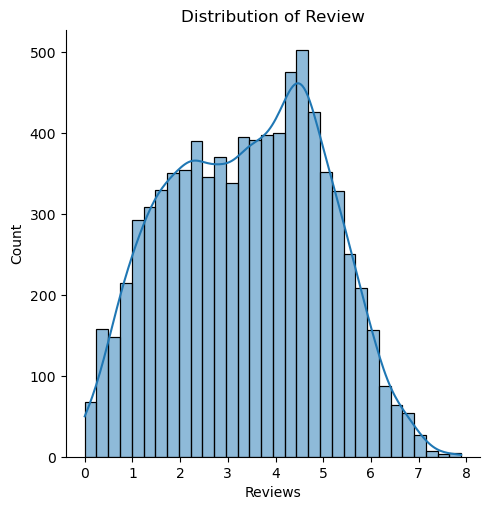

In [26]:
plt.figure(figsize=(10,7))

sns.displot(data=df,x=df['Reviews'],kde=True)
plt.title("Distribution of Review")
plt.show()

<b><font color='green'> ~ Thus we can see using the logarithmic transformation of the column 'Review' the data points are normalized to a great extend.

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [27]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8196, dtype: object

In [28]:
df['Size']=df['Size'].replace({'K':'e3','k':'e3','M':'e6','Varies with device':'0'},regex=True).map(pd.eval).astype(int)
df['Size'] 

0        19000000
1        14000000
2         8700000
3        25000000
4         2800000
           ...   
10834     2600000
10836    53000000
10837     3600000
10839           0
10840    19000000
Name: Size, Length: 8196, dtype: int32

In [29]:
zsize= df[df['Size'] == 0].index
zsize 

Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,    92,
       ...
       10645, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826, 10839],
      dtype='int64', length=1169)

In [30]:
df.drop(zsize,inplace=True)

In [31]:
df.shape 

(7027, 14)

<b><font color="green">~ Using a library to replace the values of 'K','k','M' and 'Varies with devices' with e3,e6 and 0 
    
<b><font color='green'>~ The map(pd.eval) function is use to apply the pandas function 'pd.eval' which evaluates a Python expression as a string and returns the result.
    
<b><font color='green'>~ The data type is then converted to int data type using the .astype(int) function.
    
<b><font color='green'>~ The rows with'Size'== 0 is then droped by extracting the index and droping it using .drop 

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [32]:
df['Installs'].value_counts()

Installs
1,000,000+        1175
100,000+           989
10,000+            948
1,000+             674
10,000,000+        646
500,000+           461
5,000,000+         450
50,000+            427
5,000+             413
100+               297
500+               195
50,000,000+        111
100,000,000+        96
10+                 67
50+                 56
5+                   9
500,000,000+         8
1+                   3
1,000,000,000+       2
Name: count, dtype: int64

In [33]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [34]:
#itterating through the loop to remove unwanted characters like '+' nd ','
for char in ['+',',']:
    df['Installs']=df['Installs'].str.replace(char,'')

In [35]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [36]:
df['Installs'] = df['Installs'].astype(int)


In [37]:
df['Installs'].dtype 

dtype('int32')

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [38]:
df['Price'].unique() 

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [39]:
df['Price']=df['Price'].str.replace('$','')
df['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [40]:
df['Price']  = df['Price'].astype(float)
df['Price'].dtype  

dtype('float64')

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [41]:
df.columns 

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [42]:
df.drop(['Rating','App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

In [43]:
df.shape 

(7027, 8)

<b><font color='green'>~ After removing the redundant columns we are left with '8' columns out of the '14'

# 13. Encode the categorical columns 

In [44]:
cat_col=df.select_dtypes(include='object')
cat_col 

,Category,Type,Content Rating,Rating_category
0,ART_AND_DESIGN,Free,Everyone,high
1,ART_AND_DESIGN,Free,Everyone,high
2,ART_AND_DESIGN,Free,Everyone,high
3,ART_AND_DESIGN,Free,Teen,high
4,ART_AND_DESIGN,Free,Everyone,high
...,...,...,...,...
10833,BOOKS_AND_REFERENCE,Free,Everyone,high
10834,FAMILY,Free,Everyone,high
10836,FAMILY,Free,Everyone,high
10837,FAMILY,Free,Everyone,high


In [45]:
for i in cat_col.columns:
    print(df[i].value_counts())
    print('*'*20)
    print('\n')

Category
FAMILY                 1512
GAME                    832
TOOLS                   626
PERSONALIZATION         276
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           59
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: count, dtype: int64
********************


Type
Free    6486


In [46]:
df['Rating_category'] = df['Rating_category'].map({'high':0,'low':1})

In [47]:
df['Type'] = df['Type'].map({'Free':0,'Paid':1})

In [48]:
#Creating dummies for 'Content Rating' and 'Category'

dummies = pd.get_dummies(df,columns=['Content Rating','Category'],drop_first=True)

In [49]:
dummies.shape 

(7027, 43)

<b>Interpretation 

<b><font color='green'>~Found out all the categorical columns

<b><font color='green'>~Label Encoding for : 'Type' and 'Rating Category'

<b><font color='green'>~One Hot Encoding using pandas.get_dummies() function for : 'Category' and 'Content Rating'

<b><font color='green'>~We have now encoded all the categorical variables and dropped first,so we now have 43-columns and 7027-rows    

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [50]:
X =  dummies.drop(columns='Rating_category')
y = dummies[['Rating_category']]

<b><font color='green'>~While segregating the target and independent features, ensure that we supply a '2-dimensional array' for both X and y. 

# 15. Split the dataset into train and test.


In [51]:
#using sklearn train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,train_size=0.7,random_state=42) 

# 16. Standardize the data, so that the values are within a particular range.


In [52]:
#Scaling the data generally returns the z-score of every attribute
scaler = StandardScaler()   #intializing the scaler
scaler

StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test) 

In [54]:
X_train 

array([[-0.42599451, -0.38297845, -0.17095113, ..., -0.14406769,
        -0.12940602, -0.08466242],
       [ 0.8282612 , -0.76871253, -0.13278975, ..., -0.14406769,
        -0.12940602, -0.08466242],
       [ 0.7965508 ,  0.32641756,  0.02139764, ..., -0.14406769,
        -0.12940602, -0.08466242],
       ...,
       [-1.59028826, -0.81748351, -0.17133275, ..., -0.14406769,
        -0.12940602, -0.08466242],
       [-0.8633724 ,  2.8979781 , -0.17114387, ..., -0.14406769,
        -0.12940602, -0.08466242],
       [ 0.19258132, -0.02828045, -0.16748192, ..., -0.14406769,
        -0.12940602, -0.08466242]])

In [55]:
X_test 

array([[ 1.08944347,  0.7775688 , -0.13528944, ..., -0.14080454,
        -0.12214004, -0.08463642],
       [ 0.404794  , -0.34722826, -0.13528944, ..., -0.14080454,
        -0.12214004, -0.08463642],
       [-0.5832237 , -0.7365811 , -0.15042407, ..., -0.14080454,
        -0.12214004, -0.08463642],
       ...,
       [ 0.03586211, -0.13092114, -0.13528944, ..., -0.14080454,
        -0.12214004, -0.08463642],
       [ 1.40131643,  2.55128726,  0.01605689, ..., -0.14080454,
        -0.12214004, -0.08463642],
       [-1.41126545, -0.72792881, -0.15207206, ..., -0.14080454,
        -0.12214004, -0.08463642]])

In [56]:
y_train 

array([[-0.34937446],
       [-0.34937446],
       [-0.34937446],
       ...,
       [-0.34937446],
       [ 2.86225844],
       [-0.34937446]])

In [57]:
y_test 

array([[-0.39448249],
       [-0.39448249],
       [ 2.53496673],
       ...,
       [-0.39448249],
       [-0.39448249],
       [ 2.53496673]])

# Part-2

# <font color='red'> Data Visualization on Honey Production dataset using seaborn and matplotlib libraries.
 </font> 

# Domain:  Food and agriculture

# Context:
- In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.
# Objective:
- The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get
some useful conclusions.

# Attribute Information:

| SL.No | Attribute      | Description                                |
|-------|-------------------|---------------------------------------------|
| 1     | numcol            | Number of honey producing colonies. |
| 2     | yield percol      |  Honey yield per colony. (Unit is pounds)     |
| 3     | total prod        |  Total production (numcol x yieldpercol). (Unit is pounds)         |
| 4     | price per  lb     | Refers to average price per pound based on expanded sales. Unit is dollars.|
| 5     | prodvalue         |Value of production (total prod x priceperlb). Unit is dollars|
| 6     | Stocks            |Refers to stocks held by producers. Unit is pounds|
| 7     |  Year             |Calendar year |
| 8     | State             |Different states' names.                     |



# Questions:-

# 1. Import required libraries and read the dataset.

In [58]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [59]:
df2 = pd.read_csv("honeyproduction1998-2016 (1).csv")
df2.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [60]:
df2.sample()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
46,California,465000.0,60,27900000.0,9486000.0,0.55,15345000.0,1999


In [61]:
df2.shape 

(785, 8)

<b><font color='green'>~For the dataset there are a total of '785' rows and '8' columns 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7027 non-null   object 
 1   Reviews          7027 non-null   float64
 2   Size             7027 non-null   int32  
 3   Installs         7027 non-null   int32  
 4   Type             7027 non-null   int64  
 5   Price            7027 non-null   float64
 6   Content Rating   7027 non-null   object 
 7   Rating_category  7027 non-null   int64  
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 439.2+ KB


<b><font color='green'>~In the dataset there are 2 categorical columns and 6 numeric columns 

# 3. Display the percentage distribution of the data in each year using the pie chart.


In [63]:
df2['year'].value_counts()


year
2001    44
2002    44
2003    44
1998    43
2000    43
1999    43
2006    41
2008    41
2007    41
2005    41
2004    41
2009    40
2010    40
2011    40
2012    40
2014    40
2015    40
2016    40
2013    39
Name: count, dtype: int64

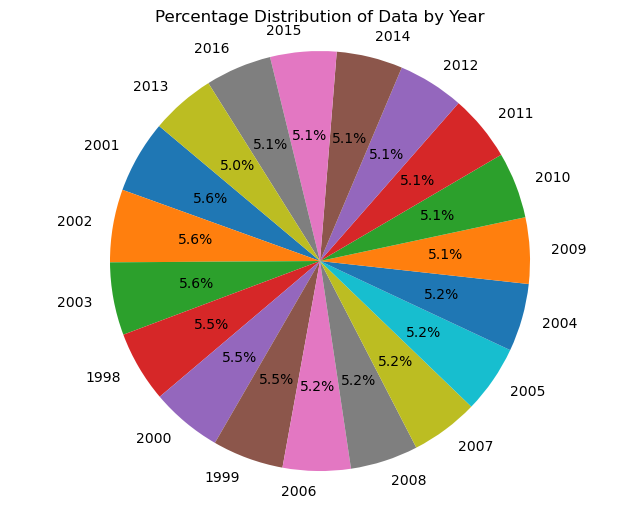

In [64]:
year_distribution = df2['year'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(year_distribution, labels=year_distribution.index, autopct='%1.1f%%',startangle=140)
plt.axis('equal')  
plt.title('Percentage Distribution of Data by Year')
plt.show()


<b><font color='green'>~ From the pie chart we can say that for the different years the distribution of the data is almost uniform

# 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings. 


<Figure size 1000x800 with 0 Axes>

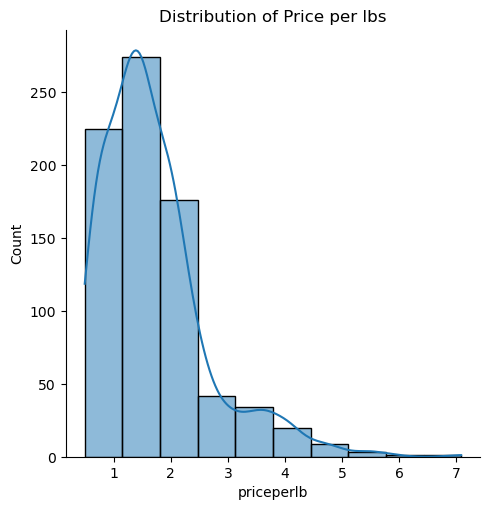

In [65]:
plt.figure(figsize=(10,8))

sns.displot(data=df2,x=df2['priceperlb'],kde=True,bins=10)
plt.title("Distribution of Price per lbs")
plt.show() 

<b><font color='green'>~ From the distribution plot we can say that the distribution of 'Price per lb' is right skewed

# 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


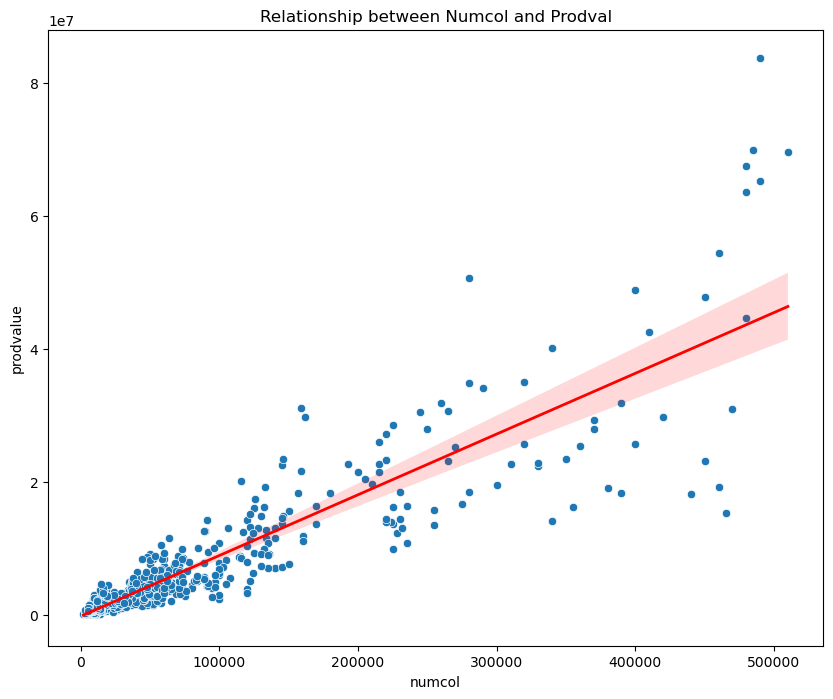

In [66]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df2,x='numcol',y='prodvalue')
sns.regplot(data=df2, x='numcol', y='prodvalue', scatter=False, color='red', line_kws={'linewidth': 2})
plt.title('Relationship between Numcol and Prodval')
plt.show()

<b><font color='green'>~ From the representation of the 'numcol' and 'prodval' we can say that initially as one increases the other increases as well(a linear pattern is observed) however for the higher values there is a variability in their relation.

# 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.


<Figure size 1400x800 with 0 Axes>

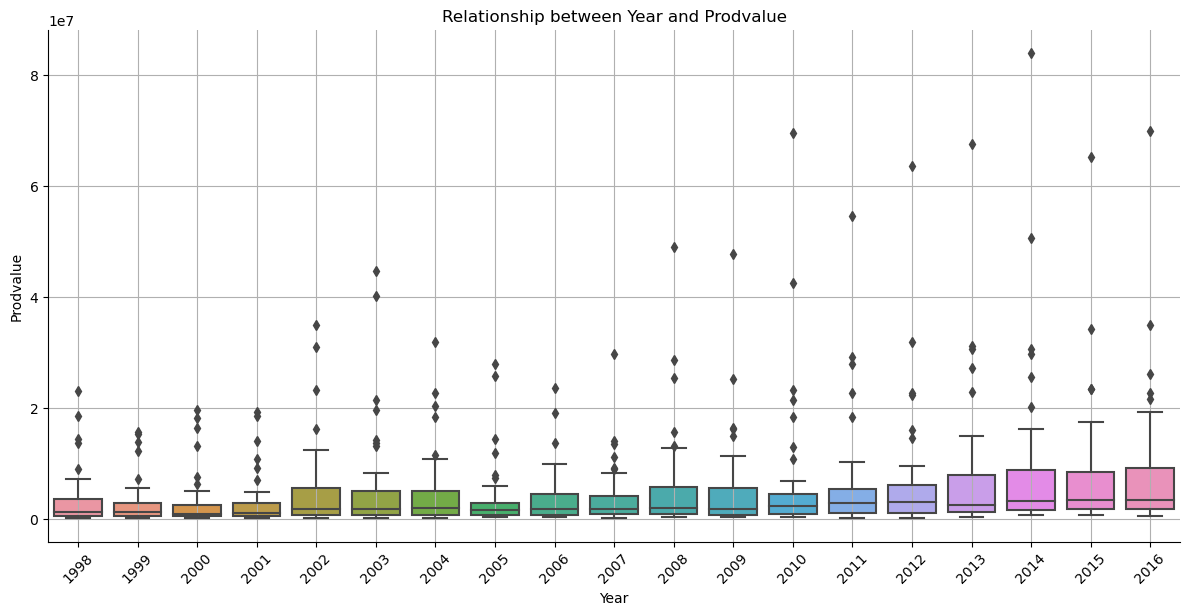

In [67]:

# Creating a grid of boxplots using catplot
plt.figure(figsize=(14, 8))
sns.catplot(x='year', y='prodvalue', kind='box', data=df2, height=6, aspect=2)
plt.title('Relationship between Year and Prodvalue')
plt.xlabel('Year')
plt.ylabel('Prodvalue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


<b><font color='green'>~There seems to be variation in total production values across different years,from 1998 to 2016.
    
<b><font color='green'>~The box plot allows us to observe the distribution of production values within each year. 

<b><font color='green'>~The highest value of production value is observed in the year 2014 it can be an outliers.


# 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


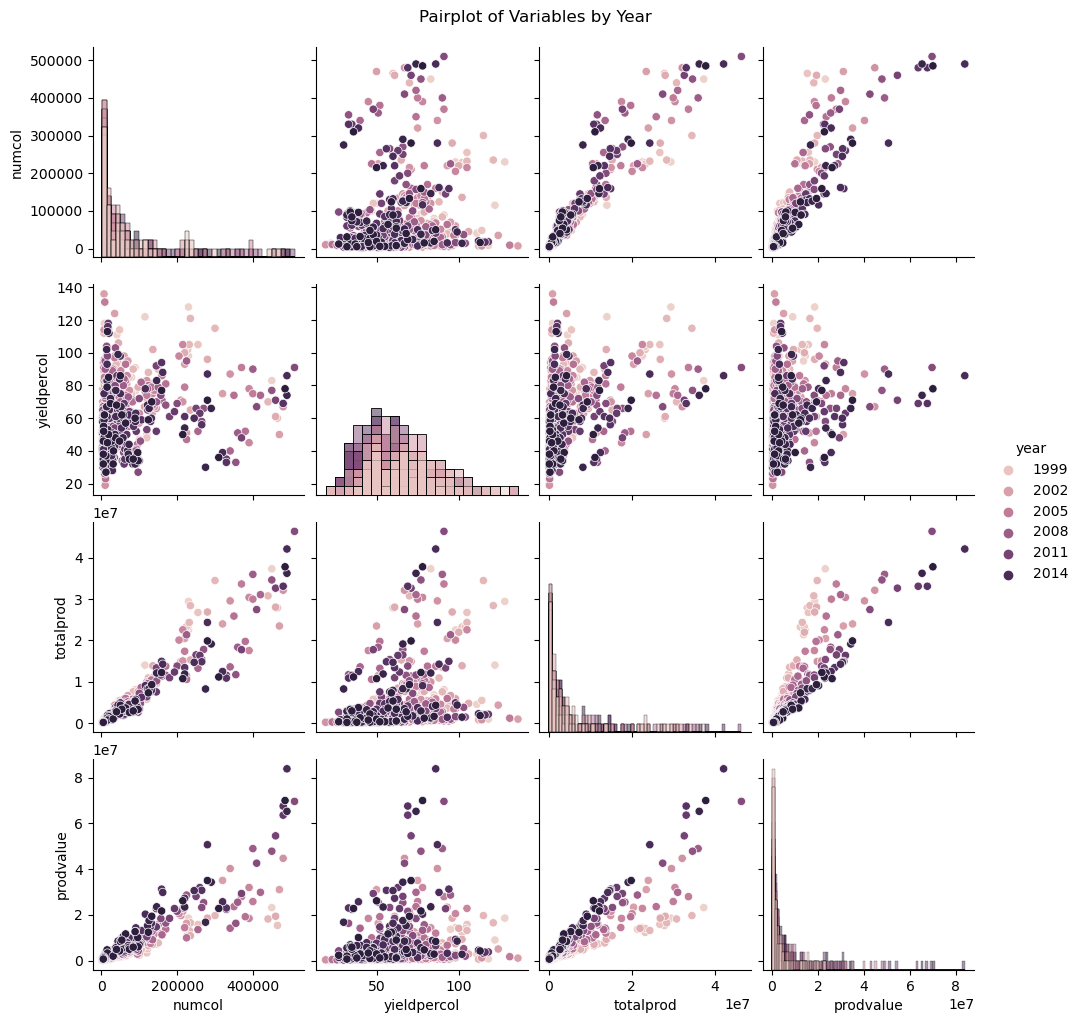

In [68]:

columns_of_interest = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue', 'year']

# Creating a pairplot
sns.pairplot(df2[columns_of_interest], hue='year', diag_kind='hist')
plt.suptitle('Pairplot of Variables by Year', y=1.02)
plt.show()


<b><font color='green'>
   ~For Numcol :  Strong Positive correlation with totalprod and prodvalue; Negative correlation between yieldpercol.
    
    
<b><font color='green'>
 ~ For Yieldpercol: From the scatter plot, we can infer that there is a negative correlation between yieldpercol and totalprod , prodvalue,  numcol. This means that as yieldpercol increases, the other decreases. This suggests that farmers are able to achieve higher total production by planting more columns, but this comes at the cost of lower yield per column. 
    
<b><font color='green'>~ For Totalprod  :There is a positive correlation between totalprod and the other variables i.e 'numcol', 'yieldpercol', 'prodvalue',
    
<b><font color='green'>~ For Prodvalue: There is a positive correlation between numcol,yieldpercol ,totalprod.

# 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

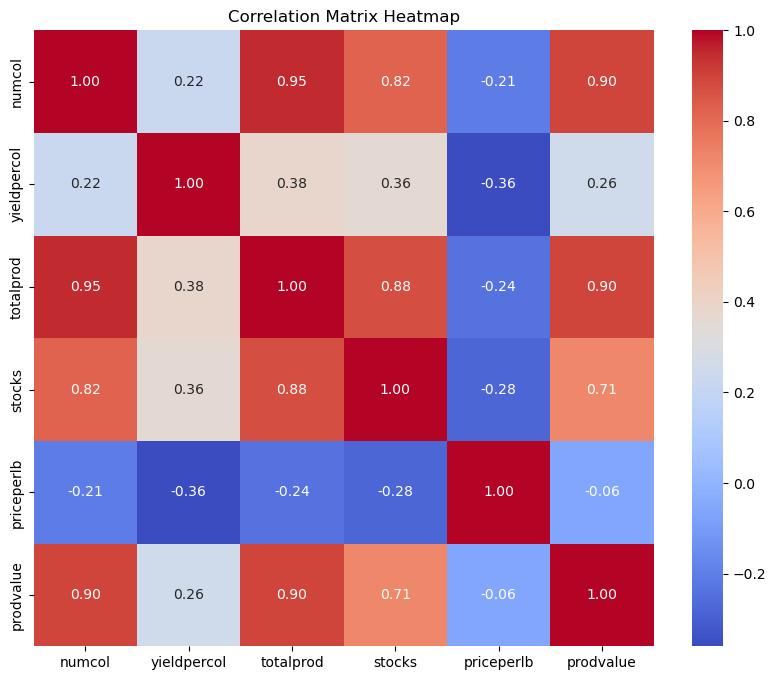

In [69]:


# Selecting the columns of interest
columns_of_interest = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']

# Creating a correlation matrix
correlation_matrix = df2[columns_of_interest].corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


<b><font color='green'>~
The highest correlation in the provided correlation matrix is between 'numcol' and 'totalprod' at approximately 0.9518.

<b><font color='green'>~The lowest correlation in the matrix appears to be between 'priceperlb' and 'numcol' at around -0.2114.





